# A Python Quick Start Tutorial
# Lesson \#1: Basic data types and functions
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [1]:
# theta needs to be in radians
# sin and cos are not part of phython

from math import sin, cos, pi, radians

In [2]:
sigx = 12.
sigy = -5.5
tauxy = 3.5
theta = 25.
theta = radians(theta)

In [3]:
sxp = sigx * cos(theta)**2 + sigy * sin(theta)**2 + 2 * tauxy * sin(theta) * cos(theta)
syp = sigx * sin(theta)**2 + sigy * cos(theta)**2 - 2 * tauxy * sin(theta) * cos(theta)
txyp = (sigy - sigx) * sin(theta) * cos(theta) + tauxy * (cos(theta)**2 - sin(theta)**2)
# print('sxp = ', sxp, 'ksi, \nsyp = ', syp, 'ksi, \ntxyp = ', txyp, 'ksi.')
print('sxp = {:8.4f} ksi \nsyp = {:8.4f} ksi \ntxyp = {:8.4f} ksi'.format(sxp, syp, txyp))

sxp =  11.5555 ksi 
syp =  -5.0555 ksi 
txyp =  -4.4531 ksi


### Exercise 2

Convert the calculation from exercise 1 to a function

In [4]:
def stressTransform(sigx, sigy, tauxy, theta):
    # YOUR CODE
    th = radians(theta)
    sxp = sigx * cos(th)**2 + sigy * sin(th)**2 + 2 * tauxy * sin(th) * cos(th)
    syp = sigx * sin(th)**2 + sigy * cos(th)**2 - 2 * tauxy * sin(th) * cos(th)
    txyp = (sigy - sigx) * sin(th) * cos(th) + tauxy * (cos(th)**2 - sin(th)**2)
    return (sxp,syp,txyp)

Test your function for 

* $\theta=0$ (what should the result look like?)
* $\theta=25^\circ$
* $\theta=180^\circ$

In [5]:
theta = 25
sxp, syp, txyp = stressTransform(sigx, sigy, tauxy, theta)
# print('sxp = ', sxp, 'ksi, \nsyp = ', syp, 'ksi, \ntxyp = ', txyp, 'ksi.')
# print('sxp = {:8.4f} ksi \nsyp = {:8.4f} ksi \ntxyp = {:8.4f} ksi\n'.format(sxp, syp, txyp))

print(f'sigx = {sigx:8.4f} ksi \nsigy = {sigy:8.4f} ksi \ntauxy = {tauxy:8.4f} ksi\n')
print(f'sxp = {sxp:8.4f} ksi \nsyp = {syp:8.4f} ksi \ntxyp = {txyp:8.4f} ksi\n')

stress = stressTransform(sigx, sigy, tauxy, theta)
template = 'sxp = {:8.4f} ksi \nsyp = {:8.4f} ksi \ntxyp = {:8.4f} ksi\n'
print(template.format(*stress))

sigx =  12.0000 ksi 
sigy =  -5.5000 ksi 
tauxy =   3.5000 ksi

sxp =  11.5555 ksi 
syp =  -5.0555 ksi 
txyp =  -4.4531 ksi

sxp =  11.5555 ksi 
syp =  -5.0555 ksi 
txyp =  -4.4531 ksi



### Exercise 3

Let's use this function to study stress transformation.  In order to do so,

1. Create a list of 81 evenly spaced $\theta$-values from $0^\circ$ to $180^\circ$.
2. Compute the transformed stress for each of these values and collect the results in three lists: 

       sigmax_values = ...
       sigmay_values = ...
       tauxy_values = ...

3. print a nice table with 4 columns: $\theta$, $\sigma_x'$, $\sigma_y'$, $\tau_{xy}'$

In [6]:
sigmax_values = []
sigmay_values = []
tauxy_values =  []

diff = 180/80
theta = []

for i in range(0, 81):
    theta.append(i*diff)
    (sigxp, sigyp, tauxyp) = stressTransform(sigx, sigy, tauxy, i*diff)
    sigmax_values.append(sigxp)
    sigmay_values.append(sigyp)
    tauxy_values.append(tauxyp)
    
# print(sigmax_values)
# print('S.No.\t theta \tsigmax\tsigmay\ttauxy')
# for i in range(0, 81):
#     print(f'{i+1} {theta[i]:8.4f}  {sigmax_values[i]:8.4f}  {sigmay_values[i]:8.4f}  {tauxy_values[i]:8.4f}')
    

print("   theta   sigma_x   sigma_y    tau_xy ")
print("=======================================")

for item in zip(theta, sigmax_values, sigmay_values, tauxy_values):
    print('{:8.4f}, {:8.4f}, {:8.4f}, {:8.4f}'.format(*item))
    
# YOUR CODE HERE

   theta   sigma_x   sigma_y    tau_xy 
  0.0000,  12.0000,  -5.5000,   3.5000
  2.2500,  12.2476,  -5.7476,   2.8027
  4.5000,  12.4398,  -5.9398,   2.0881
  6.7500,  12.5753,  -6.0753,   1.3606
  9.0000,  12.6533,  -6.1533,   0.6248
 11.2500,  12.6733,  -6.1733,  -0.1149
 13.5000,  12.6353,  -6.1353,  -0.8539
 15.7500,  12.5393,  -6.0393,  -1.5876
 18.0000,  12.3861,  -5.8861,  -2.3116
 20.2500,  12.1766,  -5.6766,  -3.0212
 22.5000,  11.9121,  -5.4121,  -3.7123
 24.7500,  11.5941,  -5.0941,  -4.3805
 27.0000,  11.2247,  -4.7247,  -5.0217
 29.2500,  10.8061,  -4.3061,  -5.6319
 31.5000,  10.3409,  -3.8409,  -6.2073
 33.7500,   9.8321,  -3.3321,  -6.7446
 36.0000,   9.2826,  -2.7826,  -7.2402
 38.2500,   8.6959,  -2.1959,  -7.6912
 40.5000,   8.0757,  -1.5757,  -8.0948
 42.7500,   7.4257,  -0.9257,  -8.4484
 45.0000,   6.7500,  -0.2500,  -8.7500
 47.2500,   6.0527,   0.4473,  -8.9976
 49.5000,   5.3381,   1.1619,  -9.1898
 51.7500,   4.6106,   1.8894,  -9.3253
 54.0000,   3.8748,   2.

### Exercise 4: Explore plotting in python

For this, check out https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/simple_plot.html#sphx-glr-gallery-lines-bars-and-markers-simple-plot-py

I copied the demo code below so you can modify it to plot $(\sigma_{x}'/\tau_{xy}')$ and  $(\sigma_{y}'/-\tau_{xy}')$ curves from the data collected in `sigmax_values`, `sigmay_values`, `tauxy_values`

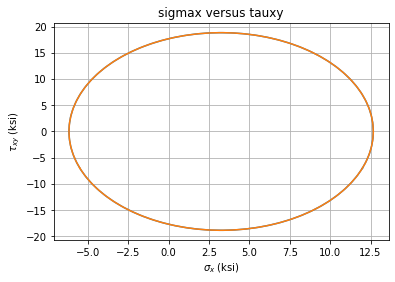

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
# t = np.arange(0.0, 2.0, 0.01)
# s = 1 + np.sin(2 * np.pi * t)
    
for i in range(0, 81):
    tauyx_values[i] = -1*tauxy_values[i]

# print(tauyx_values)

fig, ax = plt.subplots()
ax.plot(sigmax_values, tauxy_values)
ax.plot(sigmay_values, tauyx_values)

ax.set(xlabel='$\sigma_x $ (ksi)', ylabel='$\\tau_{xy} $ (ksi)',
       title='sigmax versus tauxy')
ax.grid()

# I comment writing the figure to file ... makes this quicker
# fig.savefig("test.png")
plt.show()

**Remark**: This was just to wet your appetite! We will talk much more about `numpy` and `matplotlib` next week.

## Exercise 5: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[2]
        tau_xy  --> stress[3]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

Feel free to implement an alternative form of stressTrannsform() that looks like this:

In [ ]:
def stressTransform(stress, theta):
    # YOUR CODE
    # stress2 is a list or dictionary, just as stress is
    
    return stress2

## Homework questions

We can all learn from your questions!